# Assignment 1 - part 1

## Feed forward network (multilayer perceptron)

Develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts and images should also be displayed in this notebook.

### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in the parameters listed in the code cell bellow. We will test it with various values!

The architecture of the MLP shall follow the standard sequential structure of linear layers alternating with non-linearieties (you decide which one).
The number of layers within the network and their hidden size shall be specififed by the `hidden_dims` vector, that the user can set arbitrarily.
All other decisions related to the complete train and test pipeline you need to do on your own.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* train and test losses in a 2-long tuple `(train_losses, test_losses)`, where train and test losses are simple python lists
* anything else you deem important or useful (this is for you really, in case you want to re-use the function later etc.)

Furthermore, the function shall be able to produce monitoring plots of train and test losses and train and test accuracies.
There is no pre-defined design for the plots.
However, you shall annotate the graphs so that they are well readable and understandable.

The Training is happening on : cpu
Epoch [1/25], Train Loss: 0.9756, Val Loss: 0.6400
Epoch [2/25], Train Loss: 0.5826, Val Loss: 0.5433
Epoch [3/25], Train Loss: 0.5186, Val Loss: 0.4936
Epoch [4/25], Train Loss: 0.4781, Val Loss: 0.4611
Epoch [5/25], Train Loss: 0.4463, Val Loss: 0.4278
Epoch [6/25], Train Loss: 0.4214, Val Loss: 0.4070
Epoch [7/25], Train Loss: 0.4050, Val Loss: 0.4028
Epoch [8/25], Train Loss: 0.3855, Val Loss: 0.3815
Epoch [9/25], Train Loss: 0.3714, Val Loss: 0.3807
Epoch [10/25], Train Loss: 0.3566, Val Loss: 0.3597
Epoch [11/25], Train Loss: 0.3453, Val Loss: 0.3522
Epoch [12/25], Train Loss: 0.3369, Val Loss: 0.3717
Epoch [13/25], Train Loss: 0.3260, Val Loss: 0.3373
Epoch [14/25], Train Loss: 0.3177, Val Loss: 0.3423
Epoch [15/25], Train Loss: 0.3082, Val Loss: 0.3245
Epoch [16/25], Train Loss: 0.3010, Val Loss: 0.3303
Epoch [17/25], Train Loss: 0.2939, Val Loss: 0.3304
Epoch [18/25], Train Loss: 0.2903, Val Loss: 0.3271
Epoch [19/25], Train Loss: 0.2808, Val

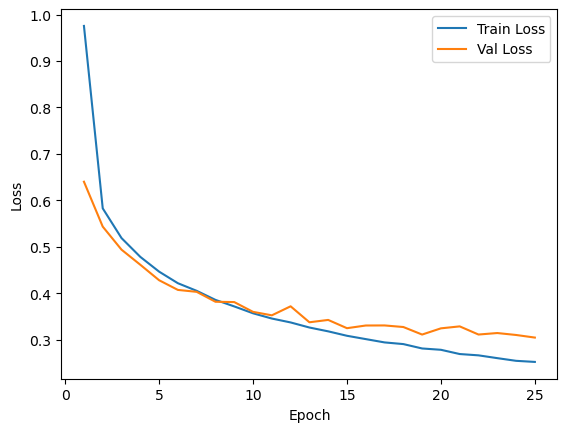

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=168, bias=True)
    (1): ReLU()
    (2): Linear(in_features=168, out_features=168, bias=True)
    (3): ReLU()
    (4): Linear(in_features=168, out_features=168, bias=True)
    (5): ReLU()
    (6): Linear(in_features=168, out_features=168, bias=True)
    (7): ReLU()
    (8): Linear(in_features=168, out_features=168, bias=True)
    (9): ReLU()
    (10): Linear(in_features=168, out_features=10, bias=True)
  )
)


In [1]:
# define function mlp_train so that it can be run from this cell
from mlp import mlp_train

epochs = 25
learning_rate = 0.0001
hidden_dims = [168,168,168,168,168]
input_size = 28*28
cuda = True
plots = True
batch_size = 64

# train and evaluate mlp_model
mlp_model, (train_losses, val_losses) = mlp_train(hidden_dims, epochs, batch_size, learning_rate, cuda, plots)
print(mlp_model)

### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

Accuracy of the network on the test images: 90 %



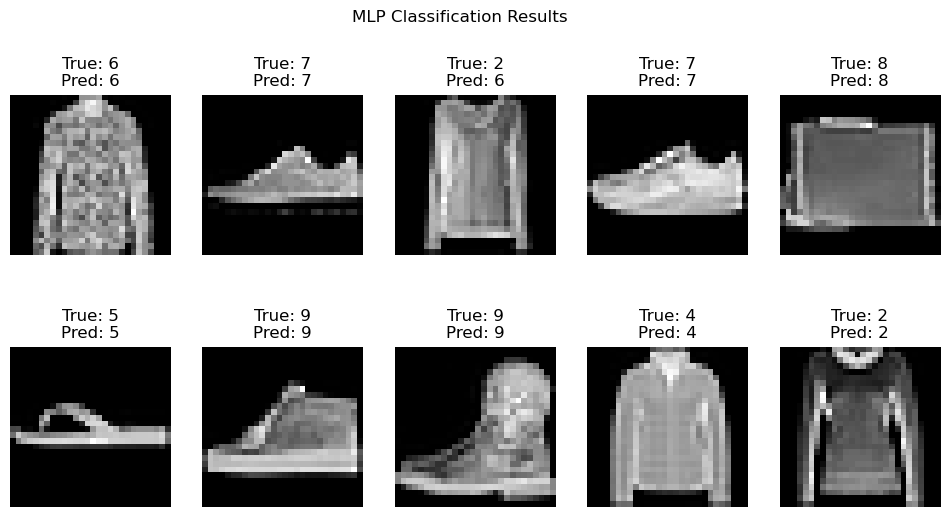

In [2]:
# define function mlp_train so that it can be run from this cell
from mlp import mlp_apply

# user parameters
test_indexes = [101,102,103,104,105,106,107,108,109,110] # list of 10 indexes - examples to extract from test set

mlp_apply(mlp_model, test_indexes)

[2371, 8434, 1698, 6115, 4368, 7833, 2333, 9823, 5452, 2700]
Accuracy of the network on the test images: 90 %



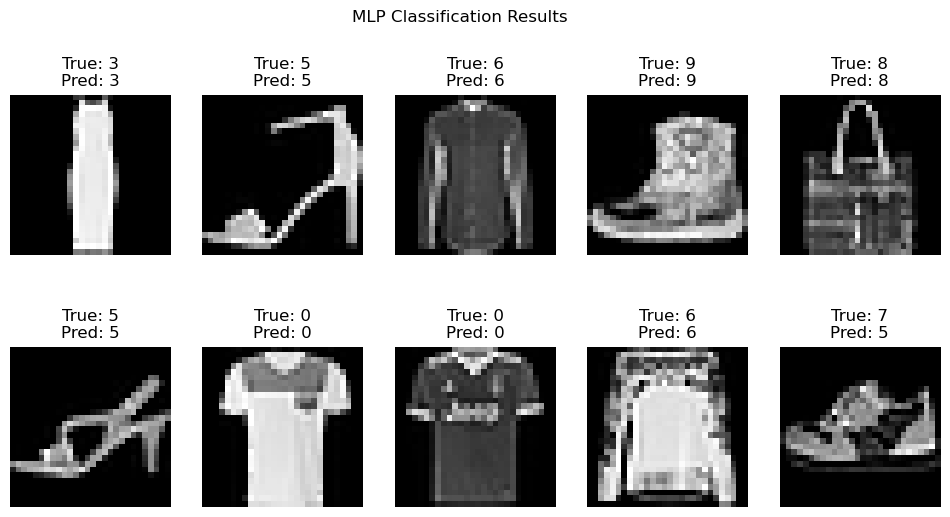

In [3]:
# Testing with random indexes to see how the model performs with multiple iterations
import random

test_indexes = []

for i in range(10):
    test_indexes.append(random.randint(1,10000))

print(test_indexes)

mlp_apply(mlp_model, test_indexes)

### Train and apply model

Use your functions defined above to train the mlp model. Try different values of the hyper-paramter (user parameters) settings. You shall achieve at least 85% test accuracy.

Produce the results (plots etc.) here and comment shortly on the results and the hyper-parameters you tested.

# Experimentation on MLP

1. Tested with different learning rates but the highest accuracy achieved is not more than 90%
2. Tested different number of hidden_dims parameters with values ranging from 5-15 but the MLP seems to be overfitting the training set more 
3. Tested with different batch_sizes and the accuracy was almost the same
4. Finally, i have concluded that training the MLP with these dimensions gave an error loss of 31% on validation set and when tested with the test set we got accuracy of around 88-90% when tested multiple times.
```
epochs = 25
learning_rate = 0.0001
hidden_dims = [168,168,168,168,168]
input_size = 28*28
cuda = True
plots = True
batch_size = 64
```
5. We have tested the network with random test_indexes and we are able to get an accuracy of over 90% atleast 7 times when tested and sometimes 80%.

6. The MLP network is showing 87% accuracy on the whole test set of 10000 images.




Accuracy of the network on the test images: 87 %



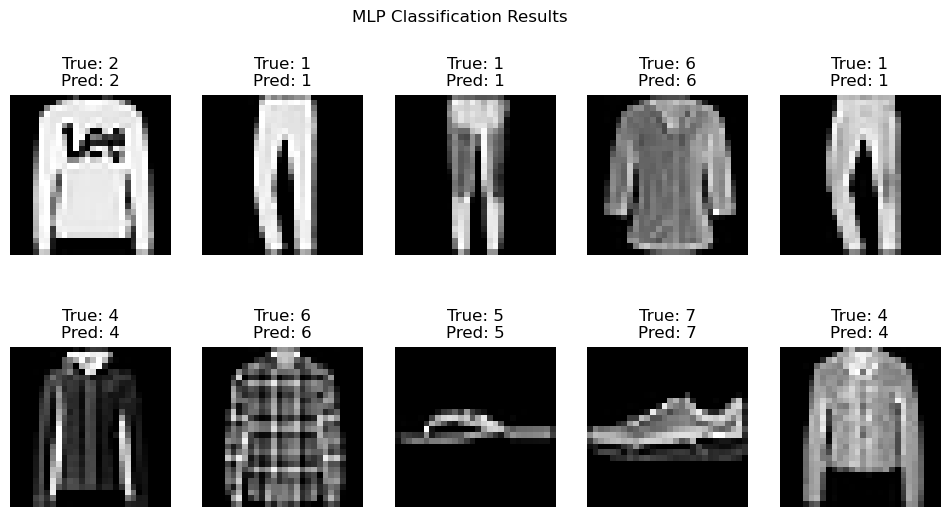

In [4]:
# testing the mlp model with all of the test set images
test_indexes = list(range(1,10000))


mlp_apply(mlp_model, test_indexes) # the images are of the first 10 indexes from the predictions

### Optional voluntary exercise

Try to enhance your MLP architecture by using droppout and/or batchnorm. Can you achieve better results with the same number of epochs?

# Testing with Dropout layers

1. Tested the above MLP network with a dropout after each ReLU activation function with the same number of epochs but the accuracy does seem to improve much compared to the MLP layers without dropout. 
2. with Dropout = 0.1 and epochs = 25 the Validation loss is around 0.3272
3. With Dropout = 0.5 and epochs = 25 , tha validation loss is around 0.3028
4. We have added dropout for every linear layer and the accuracy for random_test_indexes when tested is giving a fluctuated accuracies from 70-90%and few times 100%
5. Tested the network with only one droput added and the accuracy on whole test_set of 10000 images is 87%